# Introduction to Customer Segmentation in Python

## Task 5: K-Means Clustering
We'll talk about the [K-Means Clustering Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), and how we can use the [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) to help us out. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [2]:
df = pd.read_csv('Data/data_with_latent.csv', index_col=0)
data = np.load('Data/training_data.npy')

In [4]:
res_kpca=df[["x_kpca_cos", "y_kpca_cos"]].to_numpy()

In [48]:
clusterer=KMeans(n_clusters=5)
clusters=clusterer.fit_predict(res_kpca)

In [49]:
clusters[:5]  # we checked the result by looking into first five result

array([3, 1, 1, 4, 0], dtype=int32)

In [50]:
markers = list('*hH+xXDd|.,ov^<>12348spP')  # different ways of plotting data in matplotlib

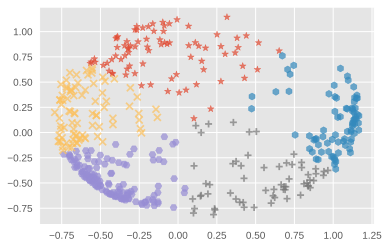

In [51]:
for cluster in np.unique(clusters):
    cluster_data=res_kpca[clusters==cluster]
    plt.scatter(
        cluster_data[:, 0], 
        cluster_data[:, 1], 
        alpha=0.7, 
        marker=markers[cluster])

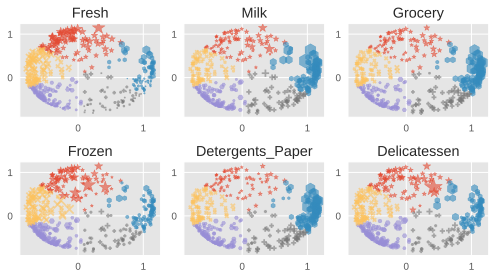

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(7, 4))

for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    for cluster in np.unique(clusters):
        cluster_data=res_kpca[clusters==cluster]
        sizes=20+20*data[:, features.index(feature)][clusters==cluster]
        ax.scatter(
            cluster_data[:, 0],
            cluster_data[:, 1],
            s=sizes,
            alpha=0.6,
            cmap=cmap,
            marker=markers[cluster])
    ax.set_title(feature)
plt.tight_layout()

In [53]:
df["cluster_kpca_cos"]=clusters
df.to_csv("Data/data_with_clusters.csv")

## Elbow Method

In [54]:
# Elbow method is used to find out what the optimal K.

In [55]:
KElbowVisualizer?

Init signature:
KElbowVisualizer(
    model,
    ax=None,
    k=10,
    metric='distortion',
    timings=True,
    locate_elbow=True,
    **kwargs,
)
Docstring:     
The K-Elbow Visualizer implements the "elbow" method of selecting the
optimal number of clusters for K-means clustering. K-means is a simple
unsupervised machine learning algorithm that groups data into a specified
number (k) of clusters. Because the user must specify in advance what k to
choose, the algorithm is somewhat naive -- it assigns all members to k
clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of
values for k (say from 1-10) and then for each value of k computes an
average score for all clusters. By default, the ``distortion`` score is
computed, the sum of square distances from each point to its assigned
center. Other metrics can also be used such as the ``silhouette`` score,
the mean silhouette coefficient for all samples or the
``c

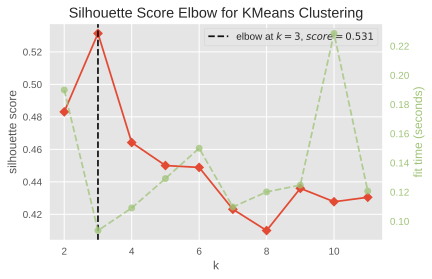

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [56]:
cluster=KMeans()
visualizer=KElbowVisualizer(clusterer, k=(2, 12), metric="silhouette")
visualizer.fit(res_kpca)
visualizer.show()

In [57]:
# Elbow method using "silhouette" metric suggests us 3 as cluster number is the optimum K value, but we wİll keep İt as 5 because a customer would want to seperate theİr custormer İnto 5 segmentatİin.